In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
L = 20
J = 1
kbt = 0.5
n_max = 10 
n0 = 1

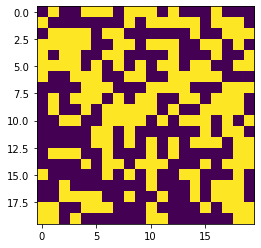

In [15]:
def init():
	initial_state = np.random.choice(([-1,1]), (L,L))
	return initial_state

plt.imshow(init())

In [16]:
def not_done(state):
    is_not_done = n0 < n_max
    return is_not_done


In [ ]:
def energy(p, state, flip):
	E1 =